In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task: Determine the eligibility for granting Home loan.

Objective of this case study is:

1.   To understand the patterns in the data.
2.   How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.


In [3]:
data = pd.read_csv("loan.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [8]:
tdf = pd.DataFrame({"feature1" :[1,2,3], 
              "feature 2" : [4,5,6]})


In [9]:
tdf

,feature1,feature 2
0,1,4
1,2,5
2,3,6


In [10]:
tdf.feature1

0    1
1    2
2    3
Name: feature1, dtype: int64

In [11]:
tdf["feature1"]

0    1
1    2
2    3
Name: feature1, dtype: int64

In [12]:
tdf["feature 2"]

0    4
1    5
2    6
Name: feature 2, dtype: int64

In [13]:
# tdf.feature 2 #Error

In [14]:
# data.Dependents.unique()

In [15]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
data.drop("Loan_ID", axis = 1, inplace  = True)

In [19]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## analyse the missing values

In [20]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
cat_columns = list(data.dtypes[data.dtypes == "object"].index)
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [23]:
cat_columns.remove("Loan_Status")

In [24]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [25]:
target = 'Loan_Status'
target

'Loan_Status'

In [26]:
num_columns = list(data.dtypes[data.dtypes != "object"].index)
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [27]:
## analysis of target varaible

In [28]:
data.shape

(614, 12)

In [29]:
data[target].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [30]:
## P(Randomly select a person, chances his loan will be rejected) ? 

In [31]:
422/(422+192)

0.6872964169381107

In [32]:
data[target].value_counts(normalize = True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [33]:
## Approval Rate ~ 69%, 40%, 56%, 10%
## Rejection Rate ~ 31% 

In [34]:
target

'Loan_Status'

<Axes: xlabel='Loan_Status', ylabel='count'>

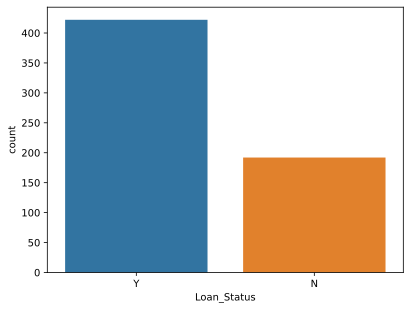

In [35]:
## let's see it visually
sns.countplot(data = data, x = target)

In [36]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


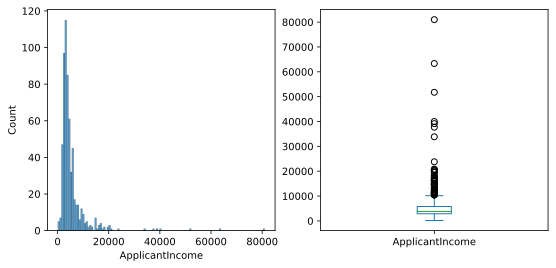

In [37]:
#Income of the applicant
plt.subplot(121)
sns.histplot(data["ApplicantIncome"])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(9,4))
plt.show()


In [38]:
data[["ApplicantIncome", "Loan_Status"]]

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y
...,...,...
609,2900,Y
610,4106,Y
611,8072,Y
612,7583,Y


In [39]:
data.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [40]:
## this diff in means, is this significant

In [41]:
from scipy.stats import ttest_ind

In [42]:
data[data[target] == "N"]["ApplicantIncome"]
data[data[target] == "Y"]["ApplicantIncome"]

0      5849
2      3000
3      2583
4      6000
5      5417
       ... 
608    3232
609    2900
610    4106
611    8072
612    7583
Name: ApplicantIncome, Length: 422, dtype: int64

In [43]:
## H0 : means are same,  ApplicantIncome is bad perdictor of loan_status

## HA : means are diff, ApplicantIncome is good perdictor of loan_status

alpha = 0.05

t_stat, p_value = ttest_ind(data[data[target] == "Y"]["ApplicantIncome"], 
          data[data[target] == "N"]["ApplicantIncome"])

print(p_value)

if p_value<alpha: 
    print("Reject H0 : ", "means are diff, ApplicantIncome is good perdictor of loan_status")
else:
     print("Fail to Reject H0 : ", "means are same, ApplicantIncome is bad perdictor of loan_status")

0.907287812130518
Fail to Reject H0 :  means are same, ApplicantIncome is bad perdictor of loan_status


In [44]:
# data

In [45]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [46]:
def feature_selction_ttest(data = data, col_name = "ApplicantIncome"):

    alpha = 0.05

    _,p_value = ttest_ind(data[data[target] == "Y"][col_name], 
              data[data[target] == "N"][col_name])
    
    print(p_value)
    
    if p_value  < alpha:
        print(f"{col_name} is a good perdictor of loan_status")
    else:
        print(f"{col_name} is a bad perdictor of loan_status")

In [47]:
feature_selction_ttest(col_name="ApplicantIncome")

0.907287812130518
ApplicantIncome is a bad perdictor of loan_status


In [48]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
data["Credit_History"].value_counts() # categorical var

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [50]:
pd.crosstab(data["Credit_History"], data[target])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [51]:
pd.crosstab(data["Credit_History"], data[target] , normalize="index")

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


In [52]:
from scipy.stats import chi2_contingency #, chisquare

In [53]:
## H0 : Credit_History is a bad perdictor of loan_status

## HA : Credit_History is a good perdictor of loan_status

alpha = 0.05

_, p_value,_,_ = chi2_contingency(pd.crosstab(data["Credit_History"], data[target]))

print(np.round(p_value))

# p_value <<<<< alpha 
# Reject H0; Credit_History is a good perdictor of loan_status

0.0


In [54]:
def feature_selction_chi2test(data = data, col_name = ""):

    alpha = 0.05


    
    print(p_value)
    
    if p_value  < alpha:
        print(f"{col_name} is a good perdictor of loan_status")
    else:
        print(f"{col_name} is a bad perdictor of loan_status")

In [55]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

## Education vs Approval